# Coronal Hole Matching between Frames using KNN and centroid distance. 

 Python libraries:
1. numpy
2. matplotlib
3. sklearn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from math import radians, cos, sin, asin, sqrt


plt.rcParams["figure.figsize"] = (10,10)

In [2]:
# centroid list and centroid label
X = np.array([[3, 0.1], [3, 2], [3.2, 1], [6, np.pi-0.5], [5, np.pi-1], [np.pi*2-.1, 3]])
Y = np.array([1, 1, 1, 2, 2, 2])

In [3]:
x_coord = []
y_coord = []
z_coord = []

for phi, theta in X:
    x_coord.append(np.sin(theta)*np.cos(phi))
    y_coord.append(np.sin(theta)*np.sin(phi))
    z_coord.append(np.cos(theta))

In [4]:
np.sin(1)*np.cos(4)

-0.5500221413615028

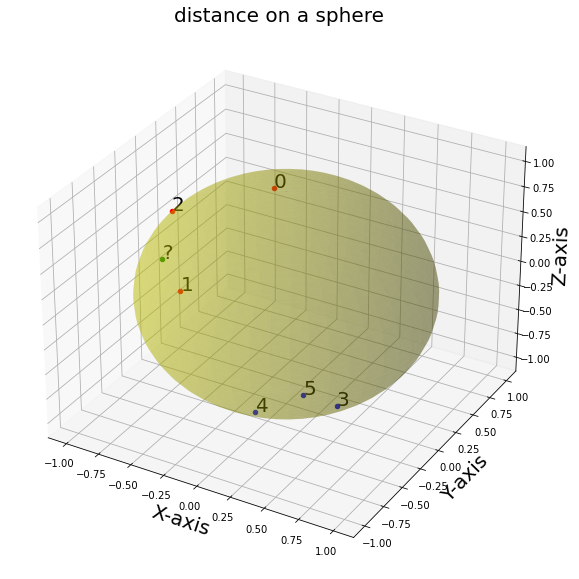

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

# draw sphere
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
# alpha controls opacity
ax.plot_surface(x, y, z, color="y", alpha=0.3)


for ii in range(len(Y)):
    if Y[ii]==1:
        color="r"
    if Y[ii]==2:
        color="b"
    ax.scatter(x_coord[ii], y_coord[ii], z_coord[ii], c=color, label=Y[ii])
    ax.text(x_coord[ii], y_coord[ii], z_coord[ii], str(ii), fontsize=20)

ax.scatter(-0.550,-0.63, 0.540, c="g", label="?")
ax.text(-0.550, -0.63, 0.540, r"?", fontsize=20)


ax.set_xlabel('X-axis', fontsize=20)
ax.set_ylabel('Y-axis', fontsize=20)
ax.set_zlabel('Z-axis', fontsize=20)

ax.set_title('distance on a sphere', fontsize=20)
plt.savefig("KNNclassifier3D.png")

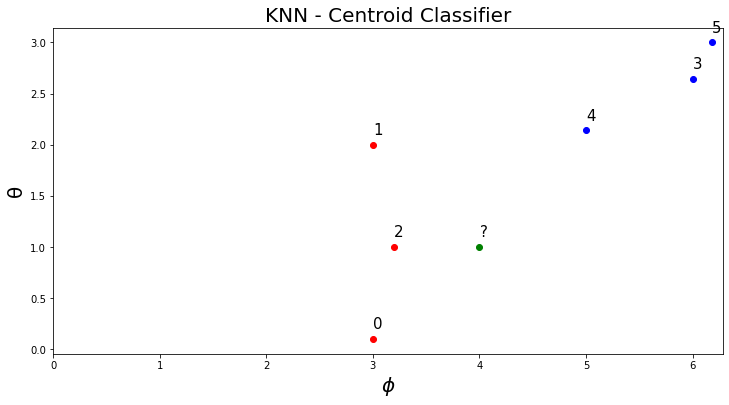

In [8]:
plt.subplots(figsize=(12, 6))

for ii in range(len(Y)):
    if Y[ii]==1:
        color="r"
    if Y[ii]==2:
        color="b"
    plt.scatter(X[ii][0], X[ii][1], c=color, label=Y[ii])
    plt.text(X[ii][0], X[ii][1]+0.1, str(ii), fontsize=15)

plt.scatter(4, 1, c="g", label="?")
plt.text(4, 1.1, r"?", fontsize=15)
plt.xlabel("$\phi$", fontsize=20)
plt.ylabel("\u03B8", fontsize=20)
plt.title("KNN - Centroid Classifier", fontsize=20)
plt.xlim(0, 2*np.pi)

#plt.legend()
plt.savefig("KNNclassifier.png")


In [10]:
def haversine(c1, c2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    lon1, lat1 = c1
    lon2, lat2 = c2
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2.)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 1 # Radius is unitary. 1 Solar Radii. 
    return c * r

In [11]:
def vincenty(c1, c2):
    """ haversine suffers from antipodal points, the vincenty formula solves such ambiguity."""
    
    lon1, lat1 = c1
    lon2, lat2 = c2
    
    dlon = abs(lon2 - lon1) 
    dlat = lat2 - lat1 
    
    term1 = np.cos(lat1)*np.sin(lat2) - np.sin(lat1)*np.cos(lat2)*np.cos(dlon)
    
    term2 = np.cos(lat2)*np.sin(dlon)
    
    num = np.sqrt(term2**2 + term1**2)
    
    denom = np.sin(lat1)*np.sin(lat2) + np.cos(lat1)*np.cos(lat2)*np.cos(dlon)
    
    return np.arctan2(num, denom)

In [133]:
#sklearn classified
clf = KNeighborsClassifier(n_neighbors=6, metric=vincenty)

In [134]:
clf.fit(X, Y)

KNeighborsClassifier(metric=<function vincenty at 0x14e0a2310>, n_neighbors=6)

In [135]:
res = clf.predict([[4, 1]])
res

array([1])

In [136]:
clf.kneighbors([[4, 1]])

(array([[0.42397562, 0.87152123, 0.92636638, 0.98801916, 1.13048736,
         1.18696572]]),
 array([[2, 1, 3, 4, 5, 0]]))

In [137]:
# VINCENTY 
jj = 0
for p, t in X:
    print(jj, Y[jj], vincenty([4, 1],  [p, t]))
    jj+=1

0 1 1.186965720241863
1 1 0.8715212348676055
2 1 0.42397562399187255
3 2 0.9263663756734888
4 2 0.9880191644568642
5 2 1.1304873649174754


In [138]:
# HAVERSINE 
jj = 0
for p, t in X:
    print(jj, Y[jj], haversine([4, 1],  [p, t]))
    jj+=1

0 1 1.186965720241863
1 1 0.8715212348676054
2 1 0.42397562399187266
3 2 0.9263663756734886
4 2 0.9880191644568641
5 2 1.1304873649174751


In [139]:
clf.predict_proba([[4, 1]])

array([[0.5, 0.5]])

In [140]:
1*0.926 +1/3*0.988 + 1/2 * 1.131

1.8208333333333333

In [141]:
1.820+1.475

3.295

In [143]:
1.475/3.295

0.4476479514415782

In [144]:
1/1.18+ 1/0.871 + 1/0.423

4.359629446689638

In [146]:
1/0.926+ 1/0.988 + 1/1.131


2.9762326538657025

In [148]:
4.359/(2.976+ 4.359)

0.5942740286298569